# KNN

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**Load Data**

In [29]:
df = pd.read_csv("result.csv")


X = df.drop(["Unnamed: 0","Unnamed: 12","maxsal","minsal","city","scale","c_desc","c_tag","name","industry","c_name"],axis=1)
X.head()
print(len(X))

4999


c:\users\yz391\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Labeling Data**

4999


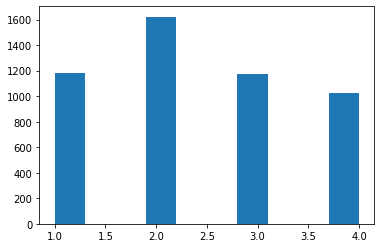

In [37]:
label = []
max_sal = df['maxsal'].to_numpy()

for i in max_sal:
    if i in range(0,150):
        label.append(1)
    elif i in range(150,175):
        label.append(2)
    
    elif i in range(175,250):
        label.append(3)
   
    else:
        label.append(4)
        
y = np.array(label)
y.reshape(len(label),1)
plt.hist(y)
print(len(y))

**Getting X**

**Splitting the data**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=120)


from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()


X_scaler.fit_transform(X_train)
X_scaler.transform(X_test)



array([[0.00537634, 0.10714286, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.00537634, 0.14285714, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.06810036, 0.17857143, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01792115, 0.28571429, 0.83333333, ..., 0.        , 1.15786324,
        0.        ],
       [0.00358423, 0.10714286, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.31541219, 0.10714286, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

**Implement KNN**

0.9832458114528632


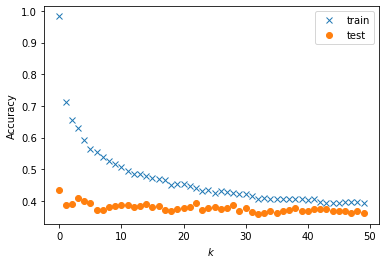

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_train = []
acc_test  = []


for i in range(1,51):
    model = KNeighborsClassifier(i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_test.append(accuracy_score(y_pred,y_test))
    
    y_pred = model.predict(X_train)
    acc_train.append(accuracy_score(y_pred,y_train))
    if (i == 1):
        print(accuracy_score(y_pred,y_train))
    
%matplotlib inline

plt.plot(acc_train,'x',label="train");
plt.plot(acc_test,'o',label="test");
plt.xlabel('$k$'); plt.ylabel('Accuracy')
plt.legend();
    


In [32]:
1600/5000

0.32

In [40]:
from sklearn.metrics import confusion_matrix
model = KNeighborsClassifier(1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)


array([[127,  66,  30,  24],
       [ 72, 181,  56,  16],
       [ 46,  53,  82,  37],
       [ 25,  42,  29, 114]], dtype=int64)